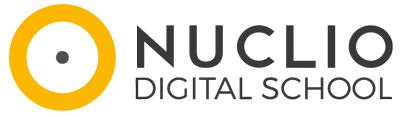

## **Identificación del riesgo de diabetes para planes de prevención y tratamiento personalizados**

**DESCRIPCIÓN DEL PROYECTO**


**Objetivo:**
El objetivo de este proyecto es desarrollar un modelo de machine learning que pueda predecir el riesgo de diabetes en pacientes basado en su historial médico e información demográfica. Este modelo debería ayudar a  profesionales de la salud a identificar pacientes en riesgo de desarrollar diabetes para: 

- Identificación Temprana: identificar pacientes que están en riesgo de desarrollar diabetes antes de que la desarrollen 
- Planes de prevención personalizados: desarrollar e implementar planes de prevención personalizados contra la diabetes.
- Asignación de recursos: Optimizar los recursos de salud enfocándose en pacientes de alto riesgo.



**Descripción del Conjunto de Datos:**
El conjunto de datos de Predicción de Diabetes es una colección integral de datos médicos y demográficos de pacientes, junto con su estado de diabetes (positivo o negativo). El conjunto de datos incluye las siguientes características:

- Age: La edad del paciente.
- Gender: El género del paciente.
- Body Mass Index (BMI): Una medida de la grasa corporal basada en la altura y el peso.
- Hypertension: Indica si el paciente tiene hipertensión.
- Heart Disease: Indica si el paciente tiene alguna enfermedad cardíaca.
- Smoking History: El historial de tabaquismo del paciente.
- HbA1c Level: El nivel de hemoglobina glucosilada en la sangre, una medida de los niveles de azúcar en sangre a largo plazo.
- Blood Glucose Level: El nivel actual de glucosa en la sangre.




In [1]:
# Install libraries
# !pip install pandas-profiling

In [2]:
# if errror with pydantic
#!pip uninstall pandas-profiling --y
#!pip install ydata-profiling

#!pip uninstall ydata-profiling --y
#!pip install ydata-profiling==4.5.1
#!pip install Pillow==10.0.1




### 1) Import libraries

In [3]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport


# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Preprocesamiento de datos y ML
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluacion
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


/Users/pedrocosta/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/pedrocosta/opt/anaconda3/lib/python3.9/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


### 2) Paths and directories

In [4]:
# Paths and directories
data_folder = '/Users/pedrocosta/Documents/Work/Nuclio/Data_Analytics/clases/modulo_ML/projects/diabetes_prediction/datasets/'
data_source = data_folder + 'diabetes_prediction_dataset.csv'


### 3) Import data

In [5]:
# Load input daset
df_diabetes = pd.read_csv(data_source)
df_diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### 4) Descriptive statistics

In [6]:
# check basic information 
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
# check for descriptive statistics
df_diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
# check for null values
df_diabetes.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
# check duplicate values
print(f'Number of rows in the diabetes dataset: {df_diabetes.shape[0]}')
print(f'Number of rows after excluding duplicates: {df_diabetes.drop_duplicates().shape[0]}')
print(f'Number of duplicated roows: {df_diabetes.duplicated().shape[0]}')

# drop duplicates
df_diabetes = df_diabetes.drop_duplicates()


Number of rows in the diabetes dataset: 100000
Number of rows after excluding duplicates: 96146
Number of duplicated roows: 100000


### 5) Data exploration

#### 5.1) Diabetes vs categorical variables

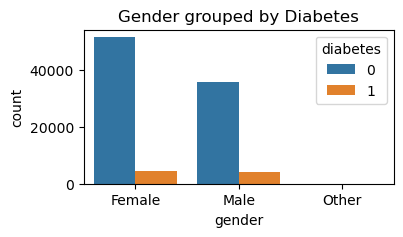

In [10]:
# Plot gender grouped by diabetes
fig, ax = plt.subplots(figsize=(4,2))
sns.countplot(x='gender', hue='diabetes', data=df_diabetes)
ax.set_title('Gender grouped by Diabetes')
plt.show()


En vez de crear los plots uno por uno, combinémoslos en un solo grid

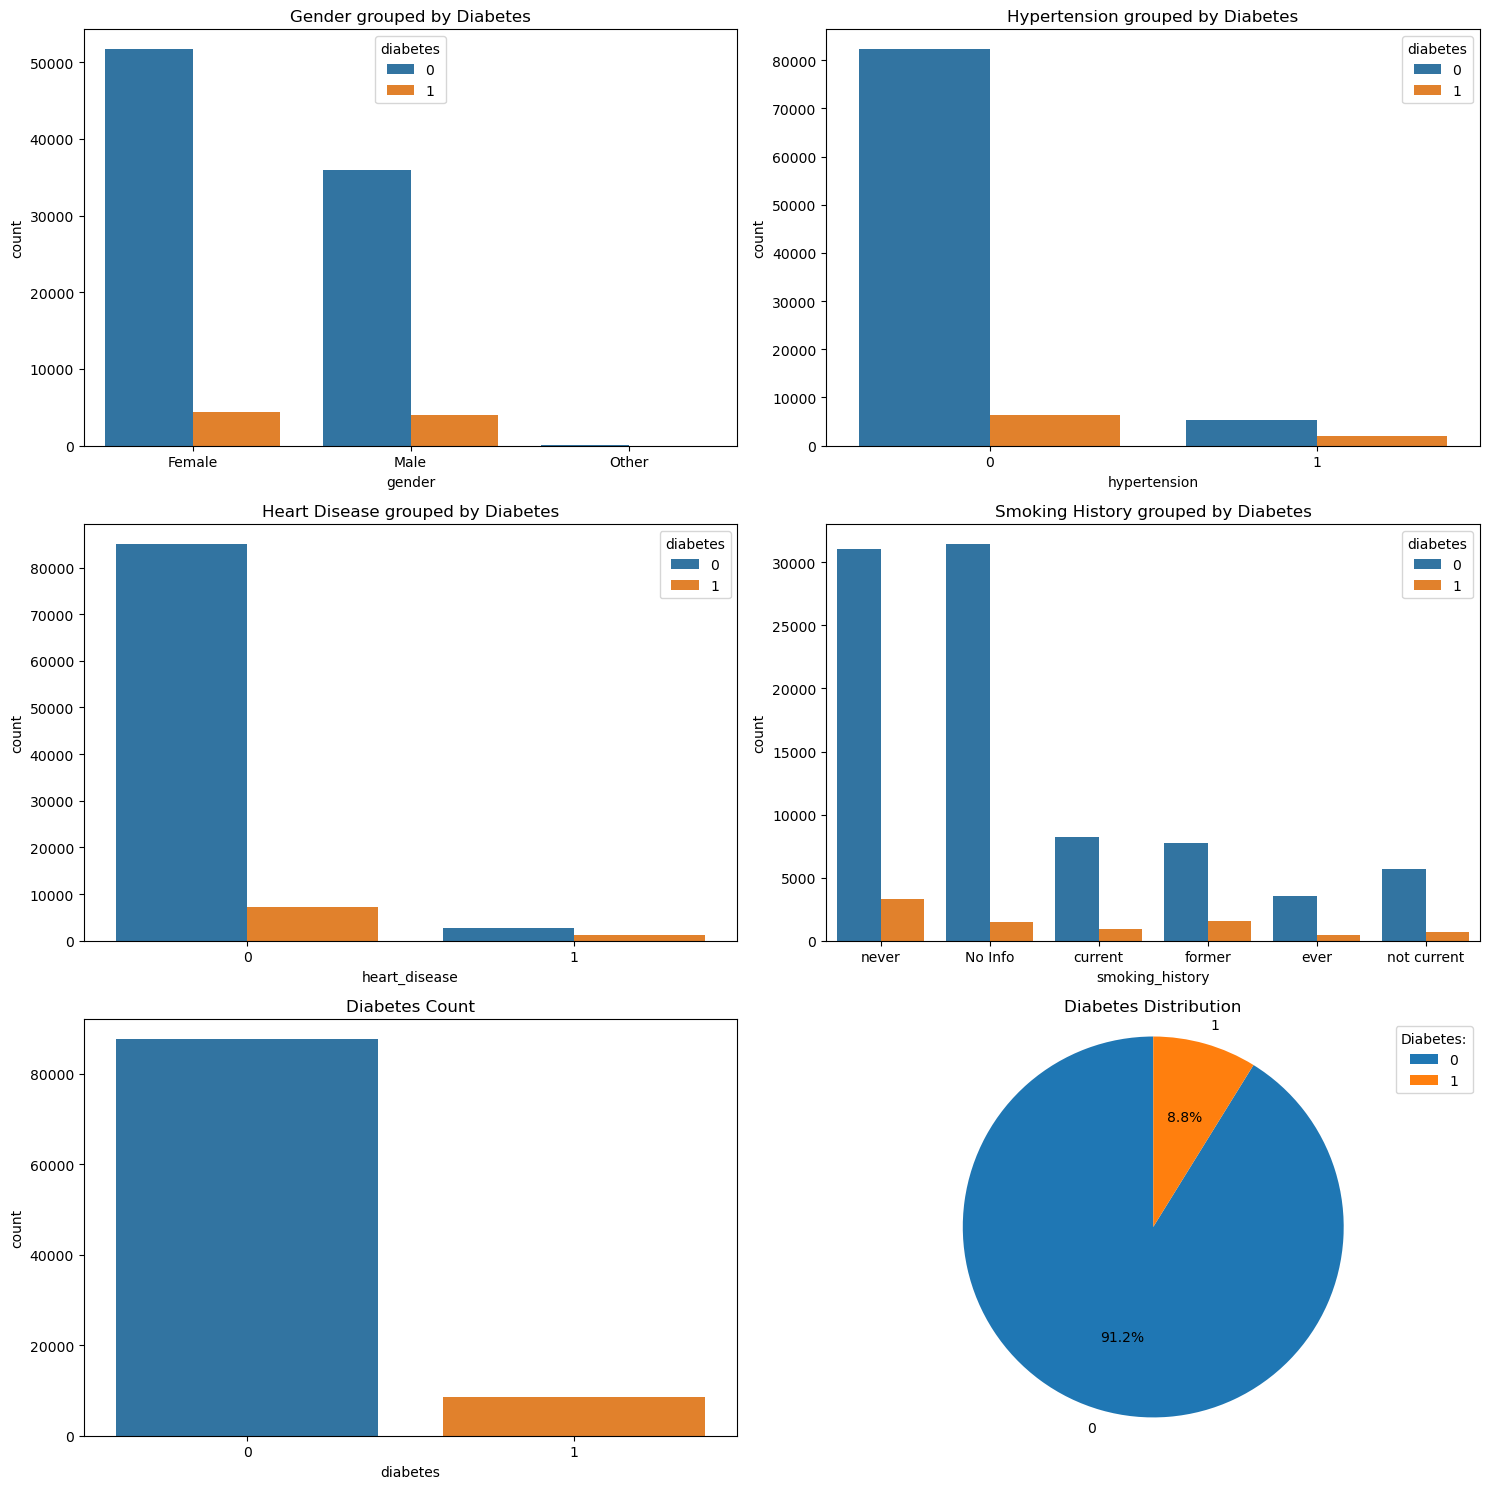

In [11]:
# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot gender grouped by diabetes
ax = sns.countplot(ax=axes[0, 0], x='gender', hue='diabetes', data=df_diabetes)
axes[0, 0].set_title('Gender grouped by Diabetes')

# Plot hypertension grouped by diabetes
ax = sns.countplot(ax=axes[0, 1], x='hypertension', hue='diabetes', data=df_diabetes)
axes[0, 1].set_title('Hypertension grouped by Diabetes')

# Plot heart disease grouped by diabetes
ax = sns.countplot(ax=axes[1, 0], x='heart_disease', hue='diabetes', data=df_diabetes)
axes[1, 0].set_title('Heart Disease grouped by Diabetes')

# Plot smoking history grouped by diabetes
ax = sns.countplot(ax=axes[1, 1], x='smoking_history', hue='diabetes', data=df_diabetes)
axes[1, 1].set_title('Smoking History grouped by Diabetes')

# Plot diabetes
ax = sns.countplot(ax=axes[2, 0], x='diabetes', data=df_diabetes)
axes[2, 0].set_title('Diabetes Count')

# Create pie plot for diabetes
diabetes_counts = df_diabetes['diabetes'].value_counts()
axes[2, 1].pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
axes[2, 1].set_title('Diabetes Distribution')
axes[2, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[2, 1].legend(title='Diabetes:', loc='upper right')
# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

In [12]:
df_diabetes.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [13]:
# Calculate the Fraction of Diabetes for Each Categorical Column Value
categorical_columns = df_diabetes.select_dtypes(include=['object', 'category']).columns.tolist()
print(f'List of categorical columns: {categorical_columns}')

# Need to include the binary ones too
categorical_columns = categorical_columns + ['hypertension', 'heart_disease']


List of categorical columns: ['gender', 'smoking_history']


In [14]:
# Initialize a dictionary to hold the fraction results
fraction_results = {}

# Loop through each column
for column in categorical_columns:
    if column == 'diabetes':
        continue  # Skip the diabetes column itself
    
    # Calculate the fraction of diabetes for each unique value in the column
    fraction_df = df_diabetes.groupby(column)['diabetes'].mean().reset_index()
    fraction_df.rename(columns={'diabetes': f'{column}_diabetes_fraction'}, inplace=True)
    
    # Store the result in the dictionary
    fraction_results[column] = fraction_df

# Display the results
for column, result_df in fraction_results.items():
    print(f"Fraction of diabetes for each value in column '{column}':")
    print(result_df)
    print()

Fraction of diabetes for each value in column 'gender':
   gender  gender_diabetes_fraction
0  Female                  0.079183
1    Male                  0.100958
2   Other                  0.000000

Fraction of diabetes for each value in column 'smoking_history':
  smoking_history  smoking_history_diabetes_fraction
0         No Info                           0.043938
1         current                           0.103077
2            ever                           0.118059
3          former                           0.170986
4           never                           0.097011
5     not current                           0.108371

Fraction of diabetes for each value in column 'hypertension':
   hypertension  hypertension_diabetes_fraction
0             0                        0.072120
1             1                        0.279587

Fraction of diabetes for each value in column 'heart_disease':
   heart_disease  heart_disease_diabetes_fraction
0              0                         0

La prevalencia de la diabetes en la población general es del 8.8%. Las prevalencias en pacientes con hipertensión (28%), pacientes con enfermedades cardíacas (32%) y fumadores (10-17%) son más altas que eso. ¡Parecen ser factores de riesgo!

#### 5.2) Diabetes vs numerical variables

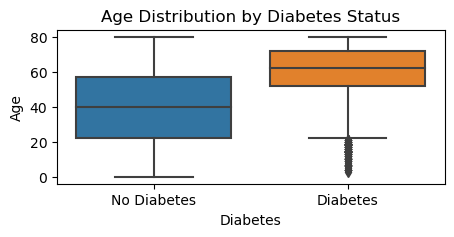

Age distribution by diabetic and non-diabetic patients: 
            count       mean        std   min   25%   50%   75%   max
diabetes                                                             
0         87664.0  39.943229  22.228281  0.08  22.0  40.0  57.0  80.0
1          8482.0  60.925961  14.545301  3.00  52.0  62.0  72.0  80.0


In [15]:
# Age
# Plotting the boxplot
plt.figure(figsize=(5, 2))
sns.boxplot(x='diabetes', y='age', data=df_diabetes)
plt.xlabel('Diabetes')
plt.ylabel('Age')
plt.title('Age Distribution by Diabetes Status')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])  # Rename the x-axis labels
plt.show()

# Print numerial distributions too
print(f'Age distribution by diabetic and non-diabetic patients: \n{df_diabetes.groupby("diabetes")["age"].describe()}')

Igual. En vez de hacerlos uno por uno, combinémoslos en un grid. 

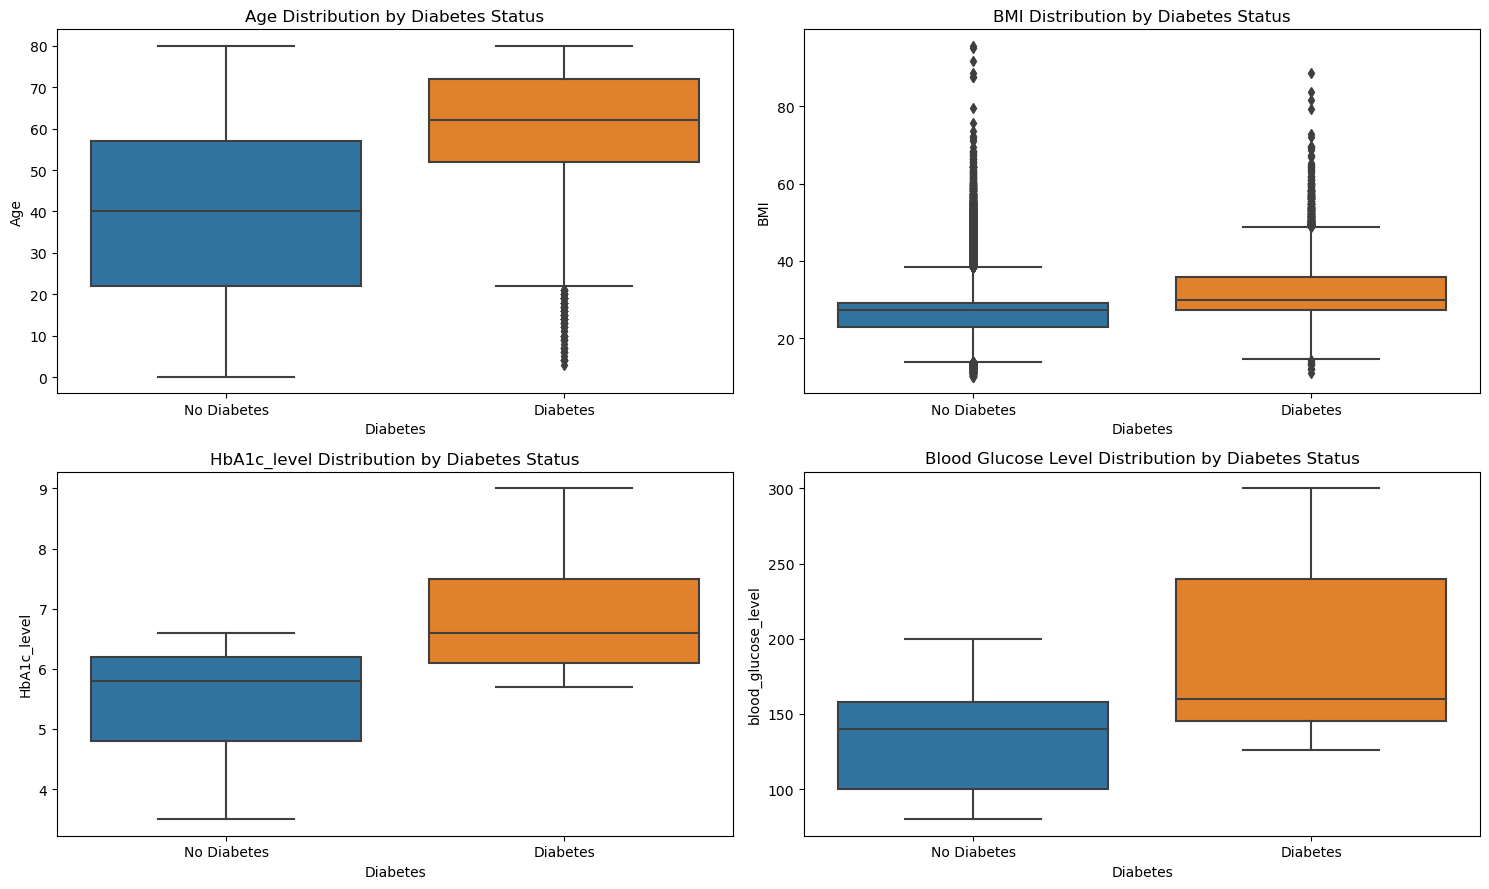

In [16]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(15, 9))

# Plot age distributions groupped by diabetes
ax = sns.boxplot(ax=axes[0, 0], x='diabetes', y='age', data=df_diabetes)
axes[0,0].set_xlabel('Diabetes')
axes[0,0].set_ylabel('Age')
axes[0, 0].set_title('Age Distribution by Diabetes Status')
axes[0, 0].set_xticks([0, 1], ['No Diabetes', 'Diabetes'])  # Rename the x-axis labels

# Plot BMI distributions groupped by diabetes
ax = sns.boxplot(ax=axes[0, 1], x='diabetes', y='bmi', data=df_diabetes)
axes[0,1].set_xlabel('Diabetes')
axes[0,1].set_ylabel('BMI')
axes[0, 1].set_title('BMI Distribution by Diabetes Status')
axes[0, 1].set_xticks([0, 1], ['No Diabetes', 'Diabetes'])  # Rename the x-axis labels

# Plot HbA1c_level distributions groupped by diabetes
ax = sns.boxplot(ax=axes[1, 0], x='diabetes', y='HbA1c_level', data=df_diabetes)
axes[1, 0].set_xlabel('Diabetes')
axes[1, 0].set_ylabel('HbA1c_level')
axes[1, 0].set_title('HbA1c_level Distribution by Diabetes Status')
axes[1, 0].set_xticks([0, 1], ['No Diabetes', 'Diabetes'])  # Rename the x-axis labels

# Plot blood_glucose_level distributions groupped by diabetes
ax = sns.boxplot(ax=axes[1, 1], x='diabetes', y='blood_glucose_level', data=df_diabetes)
axes[1, 1].set_xlabel('Diabetes')
axes[1, 1].set_ylabel('blood_glucose_level')
axes[1, 1].set_title('Blood Glucose Level Distribution by Diabetes Status')
axes[1, 1].set_xticks([0, 1], ['No Diabetes', 'Diabetes'])  # Rename the x-axis labels
# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

Claramente, las distribuciones de edades, BMI, niveles de glucosa y de hemoglobina en sangre son más altas en pacientes con diabetes. Apuntan a ser también factores de riesgo clave para la diabetes. 

Echemso un vistazo en más detalle a sus distribuciones numéricas

In [17]:
# Print numerial distributions too
# Get numerical columns (list of columns excluding the ones we had as categorical + diabetes)
num_columns = list(set(df_diabetes.columns.tolist()) - set(categorical_columns + ['diabetes']))
for column in num_columns:
    print(f'\n{column} distribution by diabetic and non-diabetic patients: \n{df_diabetes.groupby("diabetes")[column].describe()}')


HbA1c_level distribution by diabetic and non-diabetic patients: 
            count      mean       std  min  25%  50%  75%  max
diabetes                                                      
0         87664.0  5.396936  0.970833  3.5  4.8  5.8  6.2  6.6
1          8482.0  6.934827  1.076462  5.7  6.1  6.6  7.5  9.0

blood_glucose_level distribution by diabetic and non-diabetic patients: 
            count        mean        std    min    25%    50%    75%    max
diabetes                                                                   
0         87664.0  132.818489  34.241382   80.0  100.0  140.0  158.0  200.0
1          8482.0  194.026173  58.630047  126.0  145.0  160.0  240.0  300.0

age distribution by diabetic and non-diabetic patients: 
            count       mean        std   min   25%   50%   75%   max
diabetes                                                             
0         87664.0  39.943229  22.228281  0.08  22.0  40.0  57.0  80.0
1          8482.0  60.925961  14.545

Aún estamos en una fase muy inicial de entendimiento de estos datos. Deberíamos al menos:
- Profundizar en las distribuciones de cada variable (¿cómo se distribuyen sus valores?)
- Entender relaciones entre variables (p.e. correlaciones)
- Entender en más detalle la relación entre el target (diabetes) y cada variable
- Entender posibles interacciones entre variables

### 6) Pandas Profiling (quick option)

Descripción: Pandas Profiling genera rápidamente un informe completo de EDA con estadísticas descriptivas, distribuciones, correlaciones y más.

Otras alternativas similare podrían ser Sweetviz, D-Tale, Autoviz


In [18]:
# Generar el reporte de EDA
profile = ProfileReport(df_diabetes, title="Diabetes Dataset Report", explorative=True)
profile.to_file("diabetes_dataset_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
profile

### 7) Data preparation

#### 7a) Variable transformations

Necesitamos transformar las variables categóricas como smoking_history y gender antes de entrenar el modelo de regresión logística. Los modelos de regresión logística en scikit-learn no pueden manejar variables categóricas directamente; requieren que todas las variables sean numéricas.

Transformar estas variables permitirá que el modelo las utilice correctamente. Normalmente, esto se hace mediante una codificación one-hot para variables categóricas.

**Explicación sobre One-Hot Encoding**

**One-Hot Encoding** es una técnica utilizada para convertir variables categóricas a formato numérico. Las variables categóricas no pueden ser directamente utilizadas por la mayoría de los algoritmos de ML, que necesitan datos numéricos. One-Hot Encoding crea una columna binaria (que solo puede contener los valores 0 o 1) para cada valor único que exista en la variable categórica que estamos codificando, y marcar con un 1 la columna correspondiente al valor presente en cada registro, dejando las demás columnas con un valor de 0.

**Ejemplo**:
Supongamos que tenemos nuestra columna `gender` con tres valores posibles: `Male`, `Female` y `Other`. 

```plaintext
gender
------
Male
Female
Other
Male
Female
```

Al aplicar One-Hot Encoding, esta columna se transforma en tres columnas binarias (`gender_Male`, `gender_Female`, `gender_Other`), de la siguiente manera:

```plaintext
gender_Male  gender_Female  gender_Other
----------   ------------   ------------
1            0              0
0            1              0
0            0              1
1            0              0
0            1              0
```



In [20]:
# Convertir las columnas 'smoking_history' y 'gender' a variables dummy
df_diabetes = pd.get_dummies(df_diabetes, columns=['smoking_history', 'gender'], drop_first=True)

display(df_diabetes.head())

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Male,gender_Other
0,80.0,0,1,25.19,6.6,140,0,False,False,False,True,False,False,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,False,False,False,True,False,True,False
3,36.0,0,0,23.45,5.0,155,0,True,False,False,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,False,False,False,True,False


#### 7b) 

### 8) Modelos

Es crucial dividir los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento. Esto ayuda a prevenir el sobreajuste (overfitting), donde el modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien a datos nuevos.


**Separar en datasets de train y test**

Es crítico dividir los datos en conjuntos de entrenamiento y test para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento. Esto ayuda entre otras cosas a prevenir el sobreajuste (overfitting), donde el modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien a datos nuevos.


In [21]:
# Separamos variables (features) de la variable target y (daibetes)
X = df_diabetes.drop(columns=['diabetes'])
y = df_diabetes['diabetes']

# Dividir los datos en conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 8.1) Regresión logística
#### a) Training

In [22]:
# Crear una instancia del modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000)

# Entrenar el modelo
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### b) Model understanding

Una vez entrenado el modelo, podemos explorar sus parámetros

**Explicación: Coeficientes e Intercept**

- **Coeficientes**: Indican la fuerza y la dirección de la relación entre cada variable y el target. Por ejemplo, un coeficiente positivo significa que un aumento en esa variable aumenta la probabilidad de tener diabetes.
- **Intercept**: Es el valor de la log-odds de la variable objetivo cuando todas las características son cero. En otras palabras, es el punto de corte del modelo en el eje de las y cuando las x son cero.

In [23]:
# Coeficientes del modelo
coefficients = pd.DataFrame(log_reg.coef_.flatten(), index=X.columns, columns=['Coefficient'])
print("Coeficientes del modelo de regresión logística:")
print(coefficients)

intercept = log_reg.intercept_
print(f"Intercept: {intercept}")

Coeficientes del modelo de regresión logística:
                             Coefficient
age                             0.046784
hypertension                    0.746356
heart_disease                   0.739528
bmi                             0.086523
HbA1c_level                     2.318278
blood_glucose_level             0.033197
smoking_history_current         0.605689
smoking_history_ever            0.530202
smoking_history_former          0.477585
smoking_history_never           0.451169
smoking_history_not current     0.349979
gender_Male                     0.275184
gender_Other                   -0.032667
Intercept: [-27.47511642]


#### c) Making predictions

Vamos a seleccionar un paciente del conjunto de test y a realizar una predicción con el modelo de regresión logística

In [24]:
# Seleccionar un paciente del conjunto de test
sample_index = 0  # Puedes cambiar este índice para ver otros pacientes
sample = X_test.iloc[sample_index]
sample_real = y_test.iloc[sample_index]

print("Muestra seleccionada del conjunto de prueba:")
print(sample)
print(f"Valor real de la muestra (¿diabetes?): {sample_real}")

Muestra seleccionada del conjunto de prueba:
age                              5.0
hypertension                       0
heart_disease                      0
bmi                            15.14
HbA1c_level                      4.5
blood_glucose_level               90
smoking_history_current        False
smoking_history_ever           False
smoking_history_former         False
smoking_history_never          False
smoking_history_not current    False
gender_Male                    False
gender_Other                   False
Name: 2547, dtype: object
Valor real de la muestra (¿diabetes?): 0


Utilicemos el modelo para predecir si este paciente tiene riesgo o no de diabetes

In [25]:
# Realizar la predicción
sample_pred = log_reg.predict([sample])[0]
sample_pred_proba = log_reg.predict_proba([sample])[0][1]

print(f"Predicción del modelo: {sample_pred}")
print(f"Probabilidad predicha de tener diabetes: {sample_pred_proba:.2f}")

Predicción del modelo: 0
Probabilidad predicha de tener diabetes: 0.00


Seleccionemos otro paciente del conjunto de test (ahora uno con diabetes)

In [26]:
X_test.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Male,gender_Other
2547,5.0,0,0,15.14,4.5,90,False,False,False,False,False,False,False
34774,19.0,0,0,22.74,6.6,85,False,False,False,True,False,True,False
71084,52.0,0,0,24.27,7.5,220,False,False,False,True,False,False,False
50584,55.0,0,0,27.32,5.7,85,False,False,False,False,False,True,False
80788,22.0,0,0,28.78,4.5,200,False,False,False,True,False,False,False


In [27]:
# Seleccionar el primer paciente con diabetes = 1 del conjunto de test
first_diabetes_patient_index = y_test[y_test==1].index[0]
sample_2 = X_test.loc[first_diabetes_patient_index, :]
sample_real_2 = y_test.loc[first_diabetes_patient_index]

print("Muestra seleccionada del conjunto de prueba:")
print(sample_2)
print(f"Valor real de la muestra (¿diabetes?): {sample_real_2}")

Muestra seleccionada del conjunto de prueba:
age                             52.0
hypertension                       0
heart_disease                      0
bmi                            24.27
HbA1c_level                      7.5
blood_glucose_level              220
smoking_history_current        False
smoking_history_ever           False
smoking_history_former         False
smoking_history_never           True
smoking_history_not current    False
gender_Male                    False
gender_Other                   False
Name: 71084, dtype: object
Valor real de la muestra (¿diabetes?): 1


Utilicemos el modelo para predecir si este nuevo paciente tiene riesgo o no de diabetes

In [28]:
# Realizar la predicción
sample_pred_2 = log_reg.predict([sample_2])[0]
sample_pred_proba_2 = log_reg.predict_proba([sample_2])[0][1]

print(f"Predicción del modelo: {sample_pred_2}")
print(f"Probabilidad predicha de tener diabetes: {sample_pred_proba_2:.2f}")

Predicción del modelo: 1
Probabilidad predicha de tener diabetes: 0.90


¿Y para obtener las predicciones para todo el conjunto de test? 

In [29]:
# Hacer predicciones con el conjunto de prueba
y_pred_lg = log_reg.predict(X_test)
y_pred_proba_lg = log_reg.predict_proba(X_test)[:, 1]

print(f'Predicciones para todo el conjunto de test: {y_pred_lg}')
print(f'Predicciones (probabilidades) para todo el conjunto de test: {y_pred_proba_lg}')

Predicciones para todo el conjunto de test: [0 0 1 ... 0 0 0]
Predicciones (probabilidades) para todo el conjunto de test: [3.68495702e-06 3.11021081e-03 9.00175837e-01 ... 1.41779581e-04
 1.69003463e-04 1.33935873e-06]


#### d) Evaluation (confusion matrix)

***Explicación de la Matriz de Confusión***

La **matriz de confusión** es una herramienta que permite evaluar el rendimiento de un modelo de clasificación. Proporciona una comparación entre los valores reales y las predicciones del modelo. La matriz de confusión para un problema de clasificación binaria (por ejemplo, predicción de diabetes: sí/no) se organiza de la siguiente manera:

|                | Predicho No (0) | Predicho Sí (1) |
|----------------|-----------------|-----------------|
| **Real No (0)**| Verdaderos Negativos (TN) | Falsos Positivos (FP) |
| **Real Sí (1)**| Falsos Negativos (FN)     | Verdaderos Positivos (TP) |

- **Verdaderos Negativos (TN)**: El número de pacientes que fueron correctamente clasificados como negativos (sin diabetes).
- **Falsos Positivos (FP)**: El número de pacientes que fueron incorrectamente clasificados como positivos (predicción de diabetes, pero en realidad no tienen).
- **Falsos Negativos (FN)**: El número de pacientes que fueron incorrectamente clasificados como negativos (predicción no diabetes, pero en realidad tienen).
- **Verdaderos Positivos (TP)**: El número de pacientes que fueron correctamente clasificados como positivos (con diabetes).




In [30]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

NameError: name 'y_pred' is not defined

Esto se interpreta como:

- **17325 Verdaderos Negativos (TN)**: 17325 personas fueron correctamente clasificadas como no diabéticas.
- **184 Falsos Positivos (FP)**: 184 personas fueron clasificadas incorrectamente como diabéticas, pero no lo son.
- **640 Falsos Negativos (FN)**: 640 personas fueron clasificadas incorrectamente como no diabéticas, pero en realidad sí lo son.
- **1081 Verdaderos Positivos (TP)**: 1081 personas fueron correctamente clasificadas como diabéticas.


### 8.2) Decision Tree
#### a) Training

In [ ]:
# Crear una instancia del modelo de árbol de decisión
tree_clf = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### b) Model understanding

**Explicación: Importancia de variables**

La importancia de variables muestra cómo de importantes son cada una de las varialbes para el modelo. Valores más altos indican mayor importancia.

In [ ]:
# Importancia de las características
feature_importances = pd.DataFrame(tree_clf.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print("Importancia de las características:")
print(feature_importances)

Importancia de las características:
                             Importance
HbA1c_level                    0.490889
blood_glucose_level            0.271257
bmi                            0.119015
age                            0.067957
gender_Male                    0.011920
smoking_history_never          0.008536
smoking_history_former         0.006821
smoking_history_current        0.005586
smoking_history_not current    0.005051
hypertension                   0.004812
heart_disease                  0.004262
smoking_history_ever           0.003895
gender_Other                   0.000000


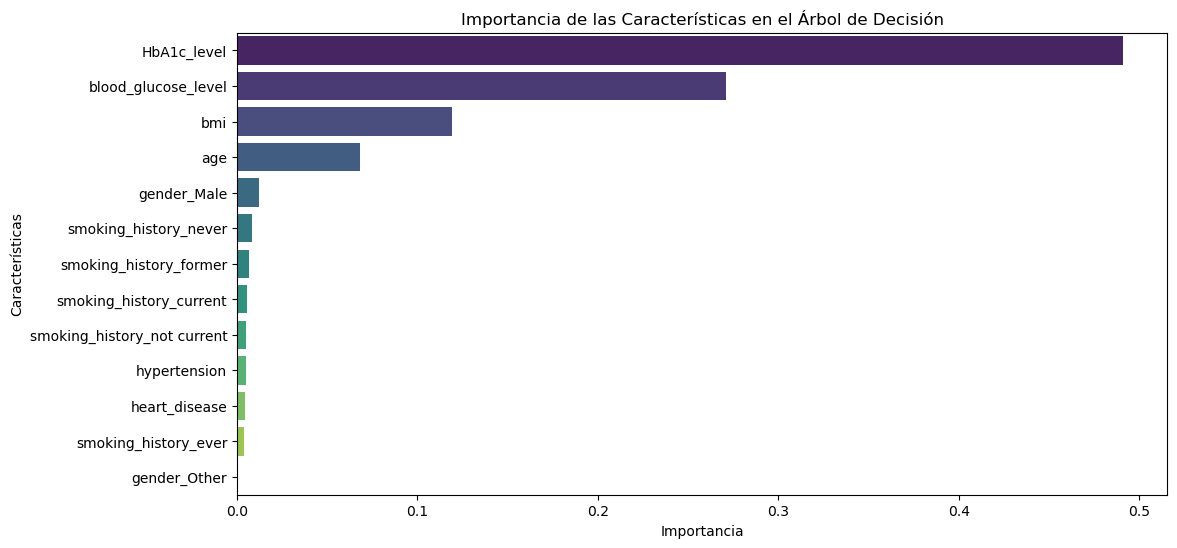

In [ ]:
# Plot de la importancia de las características
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances.index, palette='viridis')
plt.title('Importancia de las Características en el Árbol de Decisión')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

#### c) Making predictions

In [ ]:
# Hacer predicciones con el conjunto de prueba
y_pred_dt = tree_clf.predict(X_test)
y_pred_proba_dt = tree_clf.predict_proba(X_test)[:, 1]

#### d) Evaluation (confusion matrix)

In [ ]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print('Matriz de Confusión:')
print(conf_matrix)


Matriz de Confusión:
[[16974   535]
 [  455  1266]]


### 8.3) Random Forest
#### a) Training

In [ ]:
# Crear una instancia del modelo de Random Forest
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)

# Entrenar el modelo
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Explicación: Importancia de variables**

La importancia de variables muestra cómo de importantes son cada una de las varialbes para el modelo. Valores más altos indican mayor importancia.

In [ ]:
# Importancia de las características
feature_importances = pd.DataFrame(rf_clf.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print("Importancia de las características:")
print(feature_importances)

Importancia de las características:
                             Importance
HbA1c_level                    0.401458
blood_glucose_level            0.323803
bmi                            0.122721
age                            0.101810
hypertension                   0.014010
heart_disease                  0.010463
gender_Male                    0.006999
smoking_history_never          0.005330
smoking_history_former         0.004549
smoking_history_current        0.003293
smoking_history_not current    0.002882
smoking_history_ever           0.002681
gender_Other                   0.000002


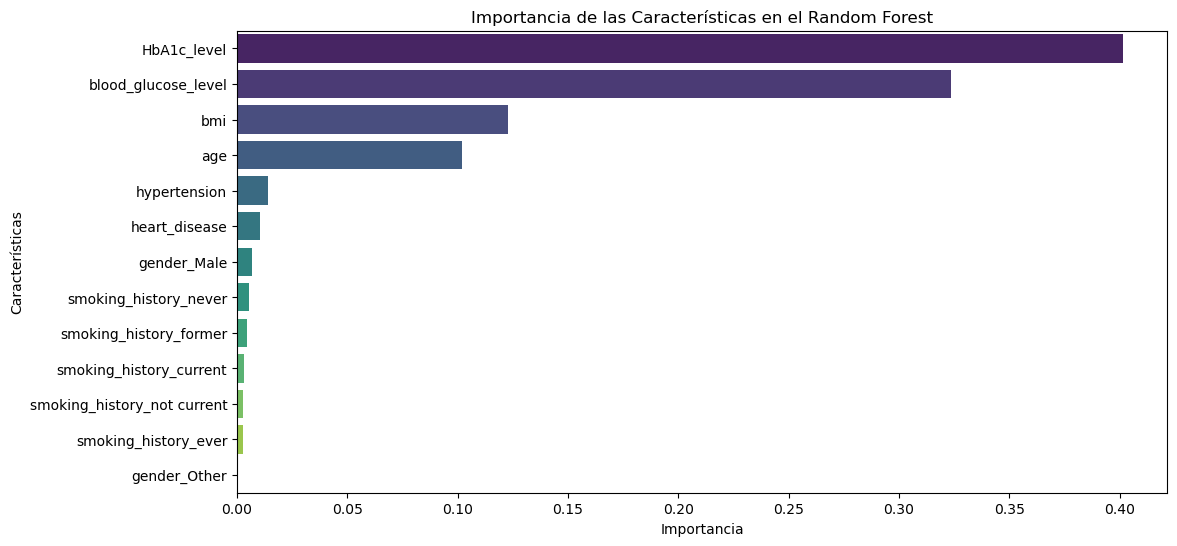

In [ ]:
# Plot de la importancia de las características
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances.index, palette='viridis')
plt.title('Importancia de las Características en el Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

#### c) Making predictions

In [ ]:
# Hacer predicciones con el conjunto de prueba
y_pred_rf = rf_clf.predict(X_test)
y_pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

#### d) Evaluation (confusion matrix)

In [ ]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print('Matriz de Confusión:')
print(conf_matrix)


Matriz de Confusión:
[[17448    61]
 [  546  1175]]


### 9) Evaluation

#### 9.1) Logistic regression

##### a) Confusion matrix

In [ ]:
# Confusion matrix
conf_matrix_lg = confusion_matrix(y_test, y_pred_lg)
print('Logistic Regression - Matriz de Confusión:')
print(conf_matrix_lg)

Logistic Regression - Matriz de Confusión:
[[17325   184]
 [  640  1081]]


##### b) Classification report

**Explicación de las Métricas en el informe de clasificación**

- **Precision (Precisión)**: La precisión es la proporción de verdaderos positivos (TP) entre el total de predicciones positivas (TP + FP). Mide la exactitud de las predicciones positivas.

  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$

  En el contexto de la clase 1 (diabetes):
  - La precisión es 0.85, lo que significa que el 85% de las veces que el modelo predice diabetes, es correcto.

- **Recall (Sensibilidad o Exhaustividad)**: La sensibilidad es la proporción de verdaderos positivos (TP) entre el total de positivos reales (TP + FN). Mide la capacidad del modelo para identificar correctamente todas las instancias positivas.

  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$

  Para la clase 1 (diabetes):
  - La sensibilidad es 0.63, lo que significa que el modelo identifica correctamente el 63% de los casos de diabetes reales.

- **F1-score**: El F1-score es la media armónica de la precisión y la sensibilidad. Proporciona un balance entre ambas métricas.

  $$
  \text{F1-score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
  $$

  Para la clase 1 (diabetes):
  - El F1-score es 0.72, indicando un equilibrio entre precisión y sensibilidad.

- **Support (Soporte)**: El soporte es el número de ocurrencias de cada clase en el conjunto de datos de prueba.

  - Para la clase 0 (no diabetes): 17509
  - Para la clase 1 (diabetes): 1721

#### Métricas Globales

- **Accuracy (Exactitud)**: El accuracy
 es la proporción de predicciones correctas (tanto positivas como negativas) sobre el total de instancias evaluadas.

  $$
  \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
  $$

  En este caso, el accuracy es 0.96, lo que significa que el modelo predice correctamente el 96% de las instancias.

- **Macro Average (Promedio Macro)**: El promedio macro calcula la métrica de interés para cada clase y luego promedia estos valores. No tiene en cuenta el desequilibrio de clases.

  - Macro Precision: 0.91
  - Macro Recall: 0.81
  - Macro F1-score: 0.85

- **Weighted Average (Promedio Ponderado)**: El promedio ponderado calcula la métrica de interés para cada clase y luego promedia estos valores, ponderado por el soporte (número de instancias de cada clase). Tiene en cuenta el desequilibrio de clases.

  - Weighted Precision: 0.95
  - Weighted Recall: 0.96
  - Weighted F1-score: 0.95

Estas métricas proporcionan una visión detallada del rendimiento del modelo, tanto a nivel global como específico para cada clase. En general, el modelo de regresión logística tiene una precisión y accuracy precisión altos, pero la sensibilidad para la clase de diabetes podría ser mucho mejor, lo que sugiere que al modelo se le están escapando varios casos de diabetes reales.

In [ ]:
# Classification report
class_report_lg = classification_report(y_test, y_pred_lg)
print('Logistic Regression - Reporte de Clasificación:')
print(class_report_lg)

Logistic Regression - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.85      0.63      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.91      0.81      0.85     19230
weighted avg       0.95      0.96      0.95     19230



##### c) ROC curve and AUC

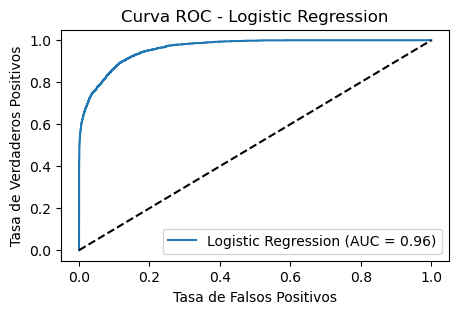

In [ ]:
# ROC curve and AUC
y_pred_proba_lg = log_reg.predict_proba(X_test)[:, 1]
roc_auc_lg = roc_auc_score(y_test, y_pred_proba_lg)
fpr_lg, tpr_lg, _ = roc_curve(y_test, y_pred_proba_lg)

plt.figure(figsize=(5, 3))
plt.plot(fpr_lg, tpr_lg, label=f'Logistic Regression (AUC = {roc_auc_lg:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Logistic Regression')
plt.legend()
plt.show()

#### 9.2) Decision Tree

##### a) Confusion matrix

In [ ]:
# Confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print('Decision Tree - Matriz de Confusión:')
print(conf_matrix_dt)

Decision Tree - Matriz de Confusión:
[[16974   535]
 [  455  1266]]


##### b) Classification report

In [ ]:
# Classification report
class_report_dt = classification_report(y_test, y_pred_dt)
print('Decision Tree - Reporte de Clasificación:')
print(class_report_dt)

Decision Tree - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17509
           1       0.70      0.74      0.72      1721

    accuracy                           0.95     19230
   macro avg       0.84      0.85      0.85     19230
weighted avg       0.95      0.95      0.95     19230



##### c) ROC curve and AUC

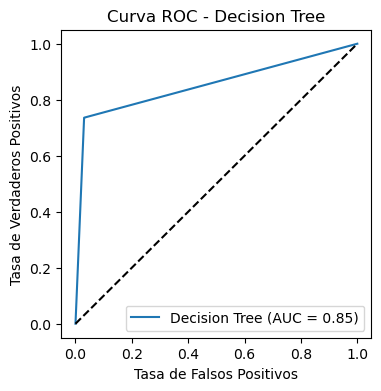

In [ ]:
# ROC curve and AUC
y_pred_proba_dt = tree_clf.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)

plt.figure(figsize=(4, 4))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Decision Tree')
plt.legend()
plt.show()

#### 8.3) Random Forest
##### a) Confusion Matrix

In [ ]:
# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print('Random Forest - Matriz de Confusión:')
print(conf_matrix_rf)

Random Forest - Matriz de Confusión:
[[17448    61]
 [  546  1175]]


##### b) Classification report

In [ ]:
# Classification report
class_report_rf = classification_report(y_test, y_pred_rf)
print('Random Forest - Reporte de Clasificación:')
print(class_report_rf)

Random Forest - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.95      0.68      0.79      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



##### c) ROC curve and AUC

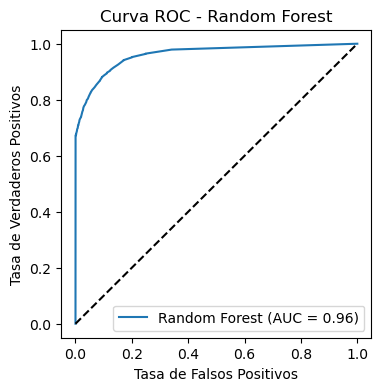

In [ ]:
# ROC curve and AUC
y_pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(4, 4))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend()
plt.show()

### 9.4) Comparative of the models
#### a) Comparative ROC Curves

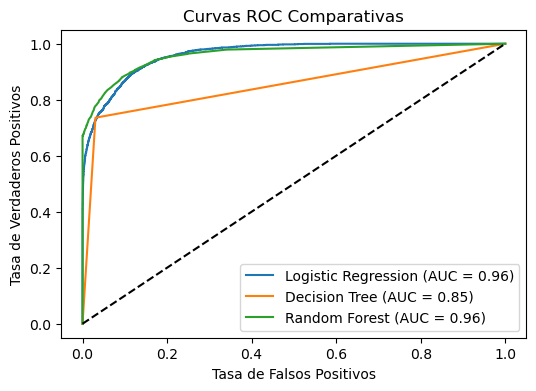

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(fpr_lg, tpr_lg, label=f'Logistic Regression (AUC = {roc_auc_lg:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC Comparativas')
plt.legend()
plt.show()

#### Comparative confusion matrices

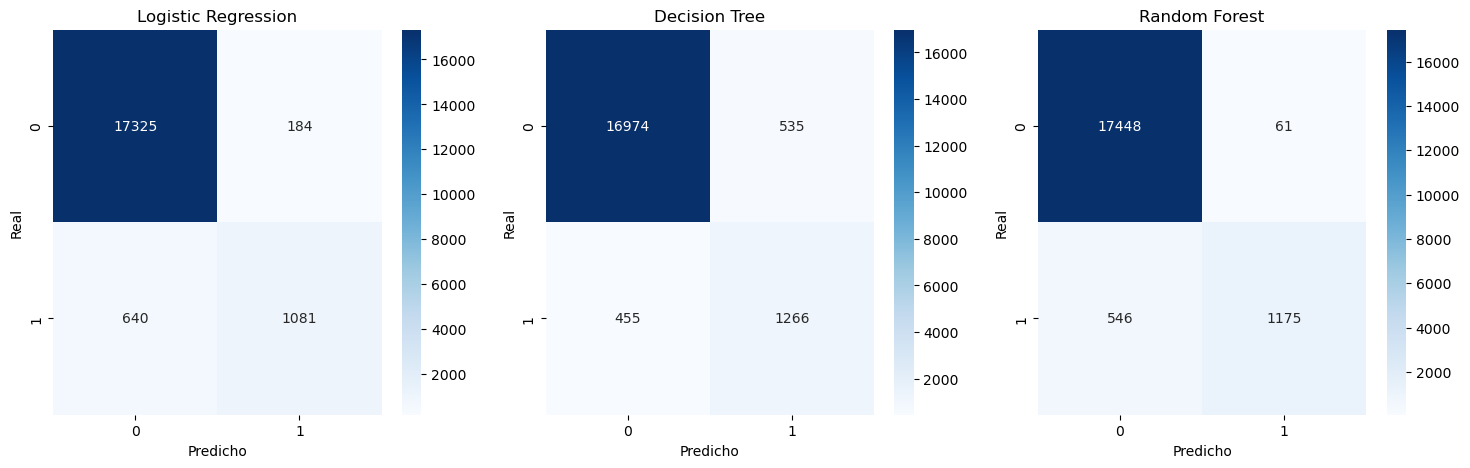

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(conf_matrix_lg, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicho')
axes[0].set_ylabel('Real')

sns.heatmap(conf_matrix_dt, annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Decision Tree')
axes[1].set_xlabel('Predicho')
axes[1].set_ylabel('Real')

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', ax=axes[2], cmap='Blues')
axes[2].set_title('Random Forest')
axes[2].set_xlabel('Predicho')
axes[2].set_ylabel('Real')

plt.show()